In [2]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt


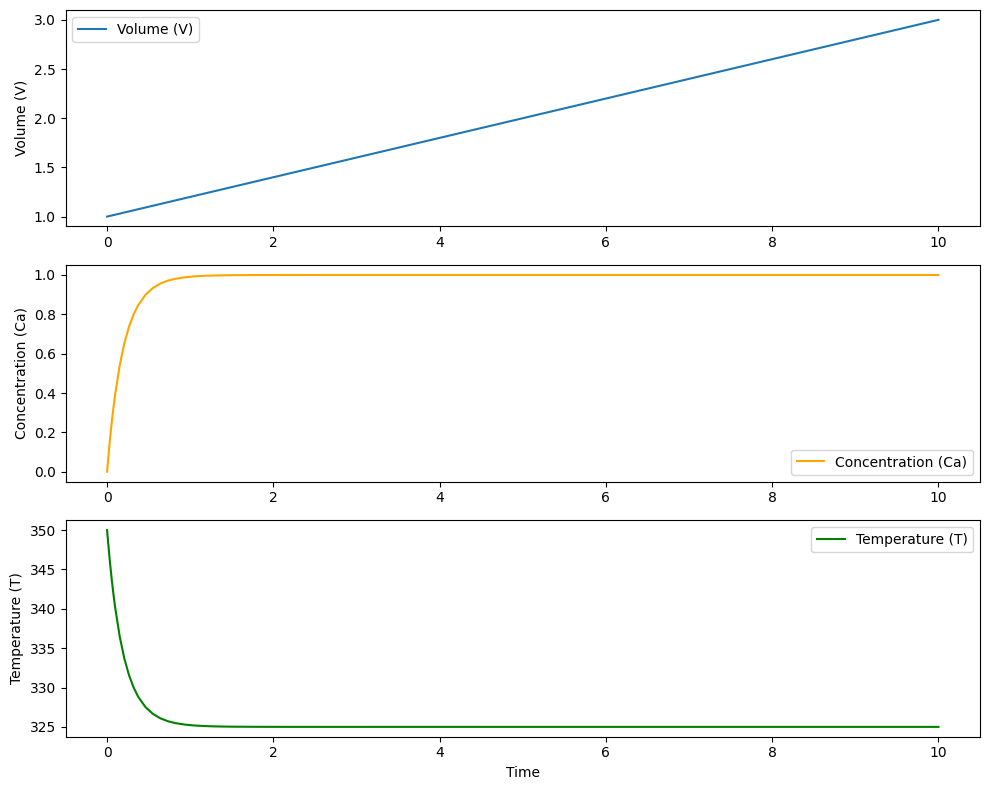

In [6]:
def model(t,y):
    
    V, Ca, T = y

    qf=5.2 if t < 50 else 5.1
    Caf=1 if t<30 else 0.5
    Tf=300 if T<300 else 325
    rA=0
    q=5
    
    dV_dt=qf-q
    dCa_dt = (qf*Caf - q*Ca)/V - rA - (Ca*dV_dt/V)

    # Energy balance: temperature derivative
    # Chain rule: d(V*T)/dt = T * dV/dt + V * dT/dt
    dT_dt = (qf*Tf - q*T)/V - (T*dV_dt/V)

    return [dV_dt,dCa_dt,dT_dt]

# Initial conditions
y0=[1,0,350]
#timespace=np.linspace(0,10,100)
timespan=(0,10)
result=solve_ivp(model,timespan,y0,method='LSODA')
    
V, Ca, T = result.y

fig, axs = plt.subplots(3, 1, figsize=(10, 8))

axs[0].plot(result.t, V, label='Volume (V)')
axs[0].set_ylabel('Volume (V)')
axs[0].legend()

axs[1].plot(result.t, Ca, label='Concentration (Ca)', color='orange')
axs[1].set_ylabel('Concentration (Ca)')
axs[1].legend()

axs[2].plot(result.t, T, label='Temperature (T)', color='green')
axs[2].set_ylabel('Temperature (T)')
axs[2].set_xlabel('Time')
axs[2].legend()

plt.tight_layout()
plt.show()
    
    
    
    

Excercise 1

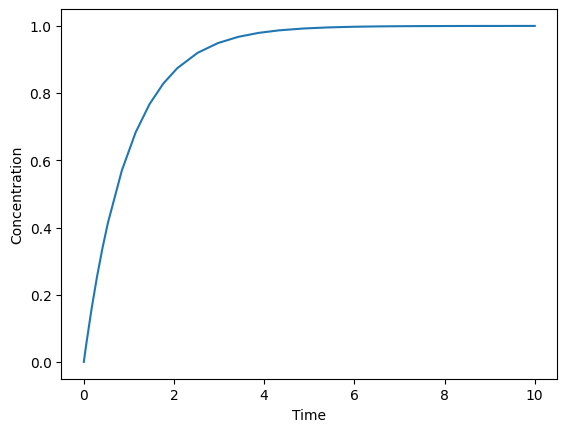

In [8]:
def energy_balance(t,y):
    V=100
    q=100
    Ca=y 
    Ca_in=1
    dCa_dt= q/V *(Ca_in - Ca)
    return dCa_dt
y0=0
timespan=(0,10)
result=solve_ivp(energy_balance,timespan,[y0],method='LSODA')
plt.plot(result.t,result.y[0])
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.show()





Excercise 2 energy balance

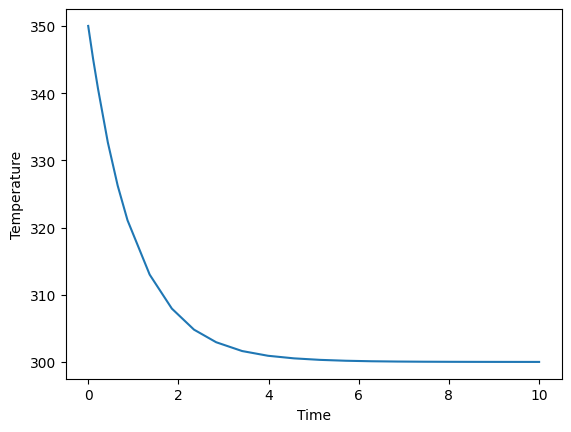

In [11]:
def energy_model(t,y):
    q=100
    V=100
    T=y 
    dT_dt= q/V *(300 - T)
    return dT_dt
y0=350
result=solve_ivp(energy_model,timespan,[y0],method='LSODA')
plt.plot(result.t,result.y[0])
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()
